# `clust-learn` - Module 2: Dimensionality reduction降维

This guide shows how to use the `dimensionality_reduction` module of the `clust-learn` package to reduce dimensionality of mixed-type data.

本指南展示了如何使用 clust-learn 包中的 dimensionality_reduction 模块来降低混合类型数据的维度。

## 0. Setup

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from clearn.dimensionality_reduction import DimensionalityReduction
from clearn.dimensionality_reduction.viz_utils import plot_compare_pca_based_components

pd.set_option('display.float_format', lambda x: '%.4f' % x,
              'display.max_columns', None,
              'display.max_colwidth', None)

## 1. Data loading

In [24]:
df = pd.read_csv('data_MAC/data_澳门_modified_preprocess_ouput.csv')
df.head()

,ASDAGE,ASRREA,ASRLIT,ASRINF,ASRIIE,ASRRSI,ASBGSEC,ASBGSSB,ASBGSB,ASBGERL,ASBGDRL,ASBGSLR,ASBGSCR,ASBGHRL,ASBHSES,ASBHELA,ASBHENA,ASBHELN,ASBHELT,ASBHPCS,ASBHPLR,ACBG09,ACBG15,ACBG16,ACBGRRS,ACBGEAS,ACBGDAS,ACDGTIHY,ATBG01,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBGEAS,ATBGSOS,ATBGTJS,ATBGSLI,ATDGLIHY,ATDGRIHY,ITSEX,ASRIBM,ASBG03,ASBG05A,ASBG05B,ASBG05E,ASBG05F,ASBG05G,ASBG05H,ASBG05I,ASBG05J,ASBG05K,ASBG06,ASBG07A,ASBG07B,ASBG08A,ASBG08B,ASBG10F,ASBR03A,ASBR03B,ASBR03C,ASBR04,ASBR05,ASDGSEC,ASDGSSB,ASDGSB,ASDGERL,ASDGDRL,ASDGSLR,ASDGSCR,ASDG05S,ASBH02A,ASBH02B,ASBH03A,ASBH03B,ASBH03C,ASBH03D,ASBH03E,ASBH04,ASBH06,ASBH07F,ASBH09,ASBH14A,ASBH14B,ASBH14C,ASBH16,ASBH18AA,ASBH18AB,ASBH18BA,ASBH18BB,ASBH18CA,ASBH18CB,ASBH18DA,ASBH18DB,ASBH18EA,ASBH18EB,ASBH19,ASBH20A,ASBH20B,ASBH20C,ASBH21A,ASBH21B,ASBH21C,ASBH21D,ASBH22,ASDGHRL,ASDHSES,ASDHELA,ASDHENA,ASDHELN,ASDHELT,ASDHPCS,ASDHPLR,ASDHAPS,ASDHEDUP,ASDHOCCP,ACBG04,ACBG05A,ACBG05B,ACBG07A,ACBG07B,ACBG07C,ACBG08,ACBG13,ACBG14A,ACBG14B,ACBG14C,ACBG14D,ACBG14E,ACBG14F,ACBG14G,ACBG14H,ACBG14I,ACBG14J,ACBG14K,ACBG14L,ACBG14M,ACBG14N,ACBG17,ACBG18A,ACBG18B,ACBG18C,ACBG19,ACBG20,ACBG21A,ACBG21B,ACBG21C,ACBG21D,ACBG21E,ACBG21F,ACDGRRS,ACDGEAS,ACDGDAS,ACDGSBC,ATBG02,ATBG03,ATBG05AA,ATBG05AB,ATBG05AC,ATBG05AD,ATBG05BA,ATBG05BB,ATBG05BC,ATBG05BD,ATBG05BE,ATBG05BF,ATBG05BG,ATBG05BH,ATBG05BI,ATBG05BJ,ATBG05BK,ATBG06,ATBG07AA,ATBG07BA,ATBG07AB,ATBG07BB,ATBG07AC,ATBG07BC,ATBG07AD,ATBG07BD,ATBG07AE,ATBG07BE,ATBG07AF,ATBG07BF,ATBG07AG,ATBG07BG,ATBG08A,ATBG08B,ATBG08C,ATBG08D,ATBG08E,ATBG09A,ATBG09B,ATBG09C,ATBG09D,ATBR06A,ATBR06B,ATBR06C,ATBR06D,ATBR06E,ATBR07AA,ATBR07AB,ATBR07AC,ATBR07AD,ATBR07BA,ATBR07BB,ATBR07BC,ATBR07BD,ATBR08A,ATBR08B,ATBR08C,ATBR08D,ATBR08E,ATBR08F,ATBR08G,ATBR08H,ATBR09A,ATBR09B,ATBR09C,ATBR09D,ATBR09E,ATBR09F,ATBR09G,ATBR09H,ATBR09I,ATBR10A,ATBR10B,ATBR10C,ATBR10D,ATBR10E,ATBR10F,ATBR10G,ATBR10H,ATBR10I,ATBR10J,ATBR10K,ATBR10L,ATBR11A,ATBR11B,ATBR11C,ATBR11D,ATBR11E,ATBR12A,ATBR12BA,ATBR12BB,ATBR12BC,ATBR12BD,ATBR12C,ATBR12DA,ATBR12DB,ATBR12DC,ATBR12EA,ATBR12EB,ATBR12EC,ATBR12ED,ATBR12EE,ATBR13A,ATBR13B,ATBR13C,ATBR13D,ATBR13E,ATBR14,ATBR15,ATBR16,ATBR17A,ATBR17B,ATBR17C,ATBR18A,ATBR18B,ATBR18C,ATBR18D,ATBR18E,ATBR19,ATDGEAS,ATDGSOS,ATDGTJS,ATDGSLI
0,9.4200,587.7808,542.6885,561.8733,559.3644,572.0576,8.7788,9.1530,8.1840,8.5445,10.9865,11.3015,10.2898,10.8926,10.7299,9.7989,10.5003,10.1163,10.8019,12.1320,9.5845,300.0000,17.0000,17.0000,9.2404,11.3257,12.9615,910.0000,32.0000,34.0000,34.0000,1.0000,8.0000,9.4411,13.6815,8.6795,10.2793,182.0000,58.5000,1,4,2,1,1,2,2,1,1,2,2,2,3,3,3,2,2,2,1,1,3,1,2,2,2,2,2,2,1,1,3,1,1,1,2,2,2,2,2,2,1,3,1,1,1,6,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,1,2,4,1,1,1,1,1,1,2,1,1,4,2,1,1,1,1,1,4,2,3,3,4,4,4,4,3,1,1,2,5,1,1,1,1,1,1,1,2,2,1,2,1,5,1,2,2,1,3,2,3,3,2,3,2,2,2,3,2,3,1,1,2,1,2,1,2,1,2,2,1,1,1,1,1,2,1,2,2,2,3,2,1,2,4,4,3,2,1,3,4,2,1,3,3,3,2,2,2,2,2,3,3,3,1,3,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,2,3,3,3,2,2,3,3,4,2,2,2,2,2,4,3,3,3,4,4,4,4,4,1,3,3,1,1,4,5,3,1,2,1,1,1,2,1,1,5,2,1,2,2
1,10.4200,576.6042,557.3837,612.5712,553.7443,594.7217,10.1209,9.8208,7.9032,10.0428,9.8975,9.1707,7.8416,10.2224,10.3472,7.6184,9.6243,8.5751,11.1839,10.1060,10.1418,300.0000,17.0000,17.0000,9.2404,11.3257,12.9615,910.0000,32.0000,34.0000,34.0000,1.0000,8.0000,9.4411,13.6815,8.6795,10.2793,182.0000,58.5000,1,4,1,1,2,1,1,1,2,2,2,2,5,2,3,2,2,1,2,1,3,2,4,2,1,2,1,2,2,3,2,1,1,1,2,2,2,2,2,3,2,2,1,1,1,5,1,1,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,1,2,4,1,1,1,1,1,1,2,1,1,4,2,1,1,1,1,1,4,2,3,3,4,4,4,4,3,1,1,2,5,1,1,1,1,1,1,1,2,2,1,2,1,5,1,2,2,1,3,2,3,3,2,3,2,2,2,3,2,3,1,1,2,1,2,1,2,1,2,2,1,1,1,1,1,2,1,2,2,2,3,2,1,2,4,4,3,2,1,3,4,2,1,3,3,3,2,2,2,2,2,3,3,3,1,3,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,2,3,3,3,2,2,3,3,4,2,2,2,2,2,4,3,3,3,4,4,4,4,4,1,3,3,1,1,4,5,3,1,2,1,1,1,2,1,1,5,2,1,2,2
2,10.2500,566.2305,527.0627,573.7171,555.5135,571.1333,11.6188,12.8526,10.2869,13.3345,13.1594,9.8629,10.9057,9.9153,9.6545,10.7707,13.2059,11.8249,12.7988,12.1320,8.6708,300.0000,17.0000,17.0000,9.

In [25]:
df.shape

(4109, 276)

We separate numerical and categorical variables.

我们分离了数值变量和分类变量。

In [26]:
num_vars = ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG05J', 'ASBG05K', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18AB', 'ASBH18BA', 'ASBH18BB', 'ASBH18CA', 'ASBH18CB', 'ASBH18DA', 'ASBH18DB', 'ASBH18EA', 'ASBH18EB', 'ASBH19', 'ASBH20A', 'ASBH20B', 'ASBH20C', 'ASBH21A', 'ASBH21B', 'ASBH21C', 'ASBH21D', 'ASBH22', 'ASDGHRL', 'ASDHSES', 'ASDHELA', 'ASDHENA', 'ASDHELN', 'ASDHELT', 'ASDHPCS', 'ASDHPLR', 'ASDHAPS', 'ASDHEDUP', 'ASDHOCCP', 'ACBG04', 'ACBG05A', 'ACBG05B', 'ACBG07A', 'ACBG07B', 'ACBG07C', 'ACBG08', 'ACBG13', 'ACBG14A', 'ACBG14B', 'ACBG14C', 'ACBG14D', 'ACBG14E', 'ACBG14F', 'ACBG14G', 'ACBG14H', 'ACBG14I', 'ACBG14J', 'ACBG14K', 'ACBG14L', 'ACBG14M', 'ACBG14N', 'ACBG17', 'ACBG18A', 'ACBG18B', 'ACBG18C', 'ACBG19', 'ACBG20', 'ACBG21A', 'ACBG21B', 'ACBG21C', 'ACBG21D', 'ACBG21E', 'ACBG21F', 'ACDGRRS', 'ACDGEAS', 'ACDGDAS', 'ACDGSBC', 'ATBG02', 'ATBG03', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA', 'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBR06A', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB', 'ATBR07AC', 'ATBR07AD', 'ATBR07BA', 'ATBR07BB', 'ATBR07BC', 'ATBR07BD', 'ATBR08A', 'ATBR08B', 'ATBR08C', 'ATBR08D', 'ATBR08E', 'ATBR08F', 'ATBR08G', 'ATBR08H', 'ATBR09A', 'ATBR09B', 'ATBR09C', 'ATBR09D', 'ATBR09E', 'ATBR09F', 'ATBR09G', 'ATBR09H', 'ATBR09I', 'ATBR10A', 'ATBR10B', 'ATBR10C', 'ATBR10D', 'ATBR10E', 'ATBR10F', 'ATBR10G', 'ATBR10H', 'ATBR10I', 'ATBR10J', 'ATBR10K', 'ATBR10L', 'ATBR11A', 'ATBR11B', 'ATBR11C', 'ATBR11D', 'ATBR11E', 'ATBR12A', 'ATBR12BA', 'ATBR12BB', 'ATBR12BC', 'ATBR12BD', 'ATBR12C', 'ATBR12DA', 'ATBR12DB', 'ATBR12DC', 'ATBR12EA', 'ATBR12EB', 'ATBR12EC', 'ATBR12ED', 'ATBR12EE', 'ATBR13A', 'ATBR13B', 'ATBR13C', 'ATBR13D', 'ATBR13E', 'ATBR14', 'ATBR15', 'ATBR16', 'ATBR17A', 'ATBR17B', 'ATBR17C', 'ATBR18A', 'ATBR18B', 'ATBR18C', 'ATBR18D', 'ATBR18E', 'ATBR19', 'ATDGEAS', 'ATDGSOS', 'ATDGTJS', 'ATDGSLI']

In [27]:
len(num_vars)+len(cat_vars)

276

## 2. Dimensionality reduction 降维

### 2.1. Run dimensionality reduction

First, we instantiate the `DimensionalityReduction` class setting `num_algorithm='spca'` so that Sparse PCA is applied on numerical variables.

首先，我们实例化 DimensionalityReduction 类，并设置 num_algorithm='spca'，以便在数值变量上应用稀疏主成分分析（Sparse PCA）。

In [28]:
# 连接列表 x 和 y
z = num_vars + cat_vars
df = df[z]

In [29]:
# 初始化降维类

dr = DimensionalityReduction(df[z], num_vars=num_vars, cat_vars=cat_vars, num_algorithm='spca')

# 即使使用SPCA，PCA的结果仍作为参考来确定解释方差，从而应用手肘法。

# SPCA + MCA 自动选择逻辑：
# 当 min_explained_variance_ratio=None 时，数值变量（SPCA）基于 PCA 的方差曲线使用手肘法，分类变量（MCA）基于校正后的方差曲线使用手肘法。
# 注意事项：
    # SPCA 的稀疏性可能导致实际解释方差与 PCA 不同，需手动验证；
        # 手肘法验证：对 SPCA 和 MCA 分别绘制解释方差曲线，观察拐点合理性：
        # # 数值变量（PCA 解释方差曲线）
        # dr.plot_num_explained_variance(plots=['cumulative'])
        # # 分类变量（MCA 解释方差曲线）
        # dr.plot_cat_explained_variance(plots=['cumulative'])
    # MCA 的校正方差计算更可靠，可直接依赖自动选择。

We set `min_explained_variance_ratio=None` so that the optimal number of components is calculated.

我们将 min_explained_variance_ratio 设置为 None，以便计算最优的成分数量。

In [30]:
# We compute the optimal number of components
# 我们计算最优的成分数量

# 训练并转换数据
# t = dr.transform(min_explained_variance_ratio=None)
t = dr.transform(min_explained_variance_ratio = 0.6)

In [31]:
# 降维后的全部变量的数量：
dr.n_components_

19

In [32]:

print("降维后的全部变量数量：", dr.n_components_, "降维后的数值变量数量：", len(dr.num_components_), "降维后的分类变量的数量：", len(dr.cat_components_))
print("降维后的数值变量：", dr.num_components_)
print("降维后的分类变量：", dr.cat_components_)

降维后的全部变量数量： 19 降维后的数值变量数量： 10 降维后的分类变量的数量： 9
降维后的数值变量： ['dim_01', 'dim_02', 'dim_03', 'dim_04', 'dim_05', 'dim_06', 'dim_07', 'dim_08', 'dim_09', 'dim_10']
降维后的分类变量： ['dim_11', 'dim_12', 'dim_13', 'dim_14', 'dim_15', 'dim_16', 'dim_17', 'dim_18', 'dim_19']


In [33]:
# 访问SPCA模型
dr.num_model


# 关键属性：
    # components_：稀疏主成分的权重矩阵，许多权重系数为 0。
    # n_components：实际计算的主成分数量。
    # 无直接解释方差：explained_variance_ratio_ 属性不可用，需手动计算（见下文）。
# 作用变化
    # 稀疏性分析：通过稀疏权重矩阵直接识别关键原始变量（非零权重的变量）。
    # 主成分可解释性：每个主成分仅由少数变量驱动，更易解释（例如：“主成分1由年龄和收入主导”）。
    # 验证需手动：需基于原始数据计算主成分的解释方差

SparsePCA(n_components=np.int64(10), random_state=42)

In [34]:
# 访问SPCA模型
pca_model = dr.num_model
print(pca_model.components_)       # 主成分的权重矩阵
# print(pca_model.explained_variance_ratio_)  # 各主成分的解释方差

[[ 5.94998657e-02  4.37428336e-01  4.28823905e-01  4.30257127e-01
   4.35746224e-01  4.36504673e-01  0.00000000e+00  0.00000000e+00
   3.07118148e-02 -5.63387555e-02 -2.79872577e-02  7.55027222e-03
   1.55361141e-01  2.92239002e-03  6.69958033e-04  2.44799699e-03
  -9.93533779e-03  0.00000000e+00  1.49099693e-01  4.48476952e-02
   0.00000000e+00  0.00000000e+00  4.00813159e-03  0.00000000e+00
   0.00000000e+00 -1.46441316e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -6.00275643e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.44640753e-02  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -1.08551975e-02  8.32586686e-03
  -9.79030995e-03  2.26190232e-02 -0.00000000e+00 -0.00000000e+00
  -3.97173391e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  6.81993079e-02
  -0.00000000e+00 -0.0000

In [35]:
# t.describe() 是 pandas 的统计方法
# 输出：生成对降维后各维度（主成分）的描述性统计信息，包括：
# 计数（count）
# 均值（mean）
# 标准差（std）
# 最小值（min）
# 四分位数（25%, 50%, 75%）
# 最大值（max）
t.describe()

# 作用：
# 数据分布分析：查看降维后每个主成分的分布特征。
# 稀疏性验证：通过标准差和极值范围，判断稀疏主成分是否合理（例如：某主成分标准差极低，可能因过度稀疏化）。
# 分布异常检测：若主成分的均值显著偏离 0 或标准差异常，可能需检查 SPCA 参数（如正则化强度 alpha）。
# 均值：SPCA 主成分的均值可能不为 0（取决于是否标准化）。
# 标准差：反映主成分的稀疏性（若某些成分方差较低，可能因权重稀疏化导致）。
# 极值：稀疏性可能放大某些变量的贡献，导致极值范围变化。

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
count,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000,4109.0000
mean,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000
std,2.2199,1.7087,1.6653,1.5775,1.4528,1.4279,1.3745,1.3675,1.1828,1.1718,0.2943,0.2748,0.2262,0.2240,0.2057,0.1933,0.1898,0.1865,0.1855
min,-9.1793,-8.3680,-4.8534,-5.8618,-4.3591,-2.4916,-5.9841,-3.2462,-2.4387,-4.2795,-0.7174,-0.3430,-0.4509,-0.6027,-0.6170,-0.4215,-0.6257,-0.4994,-0.7558
25%,-1.3501,-1.0933,-1.0187,-1.1059,-0.9954,-1.0325,-0.7924,-1.0409,-0.8305,-0.7649,-0.2115,-0.1603,-0.1669,-0.1278,-0.0967,-0.1287,-0.0645,-0.1137,-0.0828
50%,0.1600,-0.1469,-0.1550,-0.1163,-0.0789,-0.1663,0.2944,-0.3118,-0.2020,-0.0795,0.0092,-0.0472,-0.0271,-0.0170,-0.0044,-0.0191,0.0318,-0.0187,-0.0018
75%,1.5906,0.9905,1.2776,0.9947,0.9397,0.5941,0.8728,1.0989,0.7003,0.7222,0.1929,0.0692,0.1414,0.1166,0.0907,0.0985,0.1012,0.1133,0.1113
max,6.2074,7.8666,5.3974,5.4500,5.1421,7.2072,2.8338,3.7083,4.7454,3.8368,0.8053,1.1745,0.6067,0.7087,0.7258,0.5953,1.1045,0.6105,0.7941


We check that the regularization applied in SPCA and the fact that numerical and categorical variables are treated separately don't generate correlated components. We can see that most correlations are very low, with very few expections (9 pairs) showing a correlation above 0.2 in absolute value.

我们检查在稀疏主成分分析（SPCA）中应用的正则化以及数值变量和分类变量分别处理的事实是否产生了相关成分。我们可以看到大多数相关性都非常低，只有少数例外（9对）显示出绝对值超过0.2的相关性。

In [36]:
# 定义：t.corr() 计算降维后各维度之间的 皮尔逊相关系数矩阵。
# 输出：一个对称矩阵，表示所有维度两两之间的相关性（范围：-1 到 1）
t.corr()

# 数值-数值维度（SPCA）：主成分间可能存在轻微相关性（稀疏性约束破坏严格正交性）。
# 分类-分类维度（MCA）：MCA 维度间通常低相关（基于卡方距离的独立性假设）。
# 数值-分类维度：SPCA 和 MCA 的维度间可能相关（需检查是否正交）

# 作用变化
# 正交性验证：
    # PCA vs SPCA：PCA 主成分严格正交（相关系数为 0），而 SPCA 可能轻微相关。
    # 示例：若 t.corr() 显示 SPCA 主成分间相关系数为 0.2，需评估是否可接受。
# 数据融合检查：若数值和分类降维后的维度高度相关，可能需调整参数或重新训练。



,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
dim_01,1.0000,0.1125,0.1541,0.2449,0.2179,0.2074,0.0269,0.2041,0.1026,0.1012,-0.1916,-0.0698,0.1719,0.0998,0.0190,-0.0719,0.0298,-0.1119,-0.0977
dim_02,0.1125,1.0000,0.0859,0.1539,0.1978,0.0551,0.0009,0.0968,-0.0183,0.0505,-0.0612,-0.0324,0.0942,0.1753,0.0341,-0.0264,-0.0694,-0.1306,-0.0702
dim_03,0.1541,0.0859,1.0000,0.1638,0.1804,0.2320,-0.0239,0.0766,0.1290,0.1115,-0.6268,-0.3187,0.0304,0.2589,-0.0003,-0.0318,0.1873,-0.1051,-0.0224
dim_04,0.2449,0.1539,0.1638,1.0000,0.0604,0.1002,0.0090,0.1008,0.0799,0.1985,-0.2548,-0.0544,0.1275,0.0230,-0.0224,-0.0039,0.0344,-0.0157,-0.0194
dim_05,0.2179,0.1978,0.1804,0.0604,1.0000,0.1846,0.0468,0.1845,0.0758,0.0464,-0.0774,-0.0458,0.2775,0.4101,0.2366,-0.0825,-0.0965,-0.4522,0.0217
dim_06,0.2074,0.0551,0.2320,0.1002,0.1846,1.0000,-0.0041,0.1825,0.1400,0.0273,-0.2070,-0.2696,-0.0669,0.2913,0.0014,-0.0872,0.2672,-0.0355,0.0963
dim_07,0.0269,0.0009,-0.0239,0.0090,0.0468,-0.0041,1.0000,0.1534,0.0054,-0.0251,-0.0272,0.2000,0.1622,0.0626,0.1667,0.0075,-0.0432,-0.0435,0.0918
dim_08,0.2041,0.0968,0.0766,0.1008,0.1845,0.1825,0.1534,1.0000,-0.0459,0.0570,-0.3394,0.4226,0.2327,0.1136,0.0443,0.0742,-0.1883,-0.2215,0.0109
dim_09,0.1026,-0.0183,0.1290,0.0799,0.0758,0.1400,0.0054,-0.0459,1.0000,0.0002,-0.1808,0.0738,0.0813,0.0695,0.2496,-0.1418,0.1722,0.1146,0.2366
dim_10,0.1012,0.0505,0.1115,0.1985,0.0464,0.0273,-0.0251,0.0570,0.0002,1.0000,-0.0977,-0.0100,-0.0057,0.1042,-0.0320,0.0094,-0.0405,-0.0213,-0.0435


### 2.2. Explain extracted components 解释提取的成分

For components extracted from continuous variables, we're interested in finding the original variables that are highly correlated with them.

对于从连续变量（数值）中提取的成分，我们感兴趣的是找到与它们高度相关的原始变量。

In [37]:
# dr.num_main_contributors()

# 全部数值主成分的主要贡献变量
print("全部数值主成分的主要贡献变量\n", dr.num_main_contributors()) 
# 全部数值主成分的主要贡献变量:结果保存
dr.num_main_contributors().to_csv('data_MAC/data_澳门_modified_全部数值主成分的主要贡献变量.csv', index=False)
print("已完成，全部数值主成分的主要贡献变量，结果保存。")

全部数值主成分的主要贡献变量
    component var_name  corr_coeff
0     dim_01   ASRREA      0.9772
1     dim_01   ASRRSI      0.9752
2     dim_01   ASRIIE      0.9735
3     dim_01   ASRINF      0.9614
4     dim_01   ASRLIT      0.9583
5     dim_02  ASBHELN      0.9694
6     dim_02  ASBHELA      0.8878
7     dim_02  ASBHENA      0.8670
8     dim_03  ATBGEAS      0.8150
9     dim_03  ATBGSOS      0.7464
10    dim_03  ATBGTJS      0.7155
11    dim_03  ACBGDAS      0.5070
12    dim_04  ASBGERL      0.8289
13    dim_04  ASBGSLR      0.8173
14    dim_04  ASBGSSB      0.7439
15    dim_04  ASBGSEC      0.5861
16    dim_04  ASBGSCR      0.5232
17    dim_05  ASBGHRL      0.8785
18    dim_05  ASBHSES      0.8735
19    dim_06   ACBG16      0.8925
20    dim_06   ACBG15      0.8654
21    dim_07  ATBR01A      0.8478
22    dim_07  ATBR01B      0.8377
23    dim_08   ACBG09      0.8156
24    dim_08  ACBGEAS      0.6480
25    dim_09   ATBG01      0.7129
26    dim_09  ACBGRRS     -0.5167
27    dim_10   ASBGSB      0.797

In [38]:
# 数值变量的主成分贡献者
# 稀疏主成分分析
dr.num_trans_ 

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10
0,0.8159,1.2642,-0.0765,0.1007,0.6011,1.0903,0.9998,0.9829,0.6380,-0.2878
1,1.2261,-0.4632,-0.0785,0.0012,0.2510,1.1093,1.0117,0.8656,1.3279,-1.0286
2,0.6715,3.1807,0.0092,2.5135,-0.7615,1.0088,1.0961,0.8064,1.1555,1.2930
3,0.2501,-1.0691,-0.0541,-1.6349,-0.9765,0.9964,1.0429,0.7749,0.7331,-1.1291
4,0.1228,0.0100,-0.1109,0.9318,0.1868,1.0923,1.0114,0.8440,0.9782,0.7468
...,...,...,...,...,...,...,...,...,...,...
4104,2.5550,-0.0649,-0.9177,0.2145,0.0216,-1.9015,-0.4911,-1.8107,-0.5091,-1.6754
4105,0.4758,-0.4221,-0.6997,-1.7123,-0.7946,-1.8293,-0.5462,-1.7023,0.6651,-0.8130
4106,-3.0123,-1.3798,-0.8741,-1.8427,-0.4793,-1.8078,-0.6150,-1.9719,-0.7322,0.1412
4107,1.1893,-0.5889,-0.7425,-1.0465,-1.6247,-1.9156,-0.4220,-1.8785,-0.0902,-2.5689


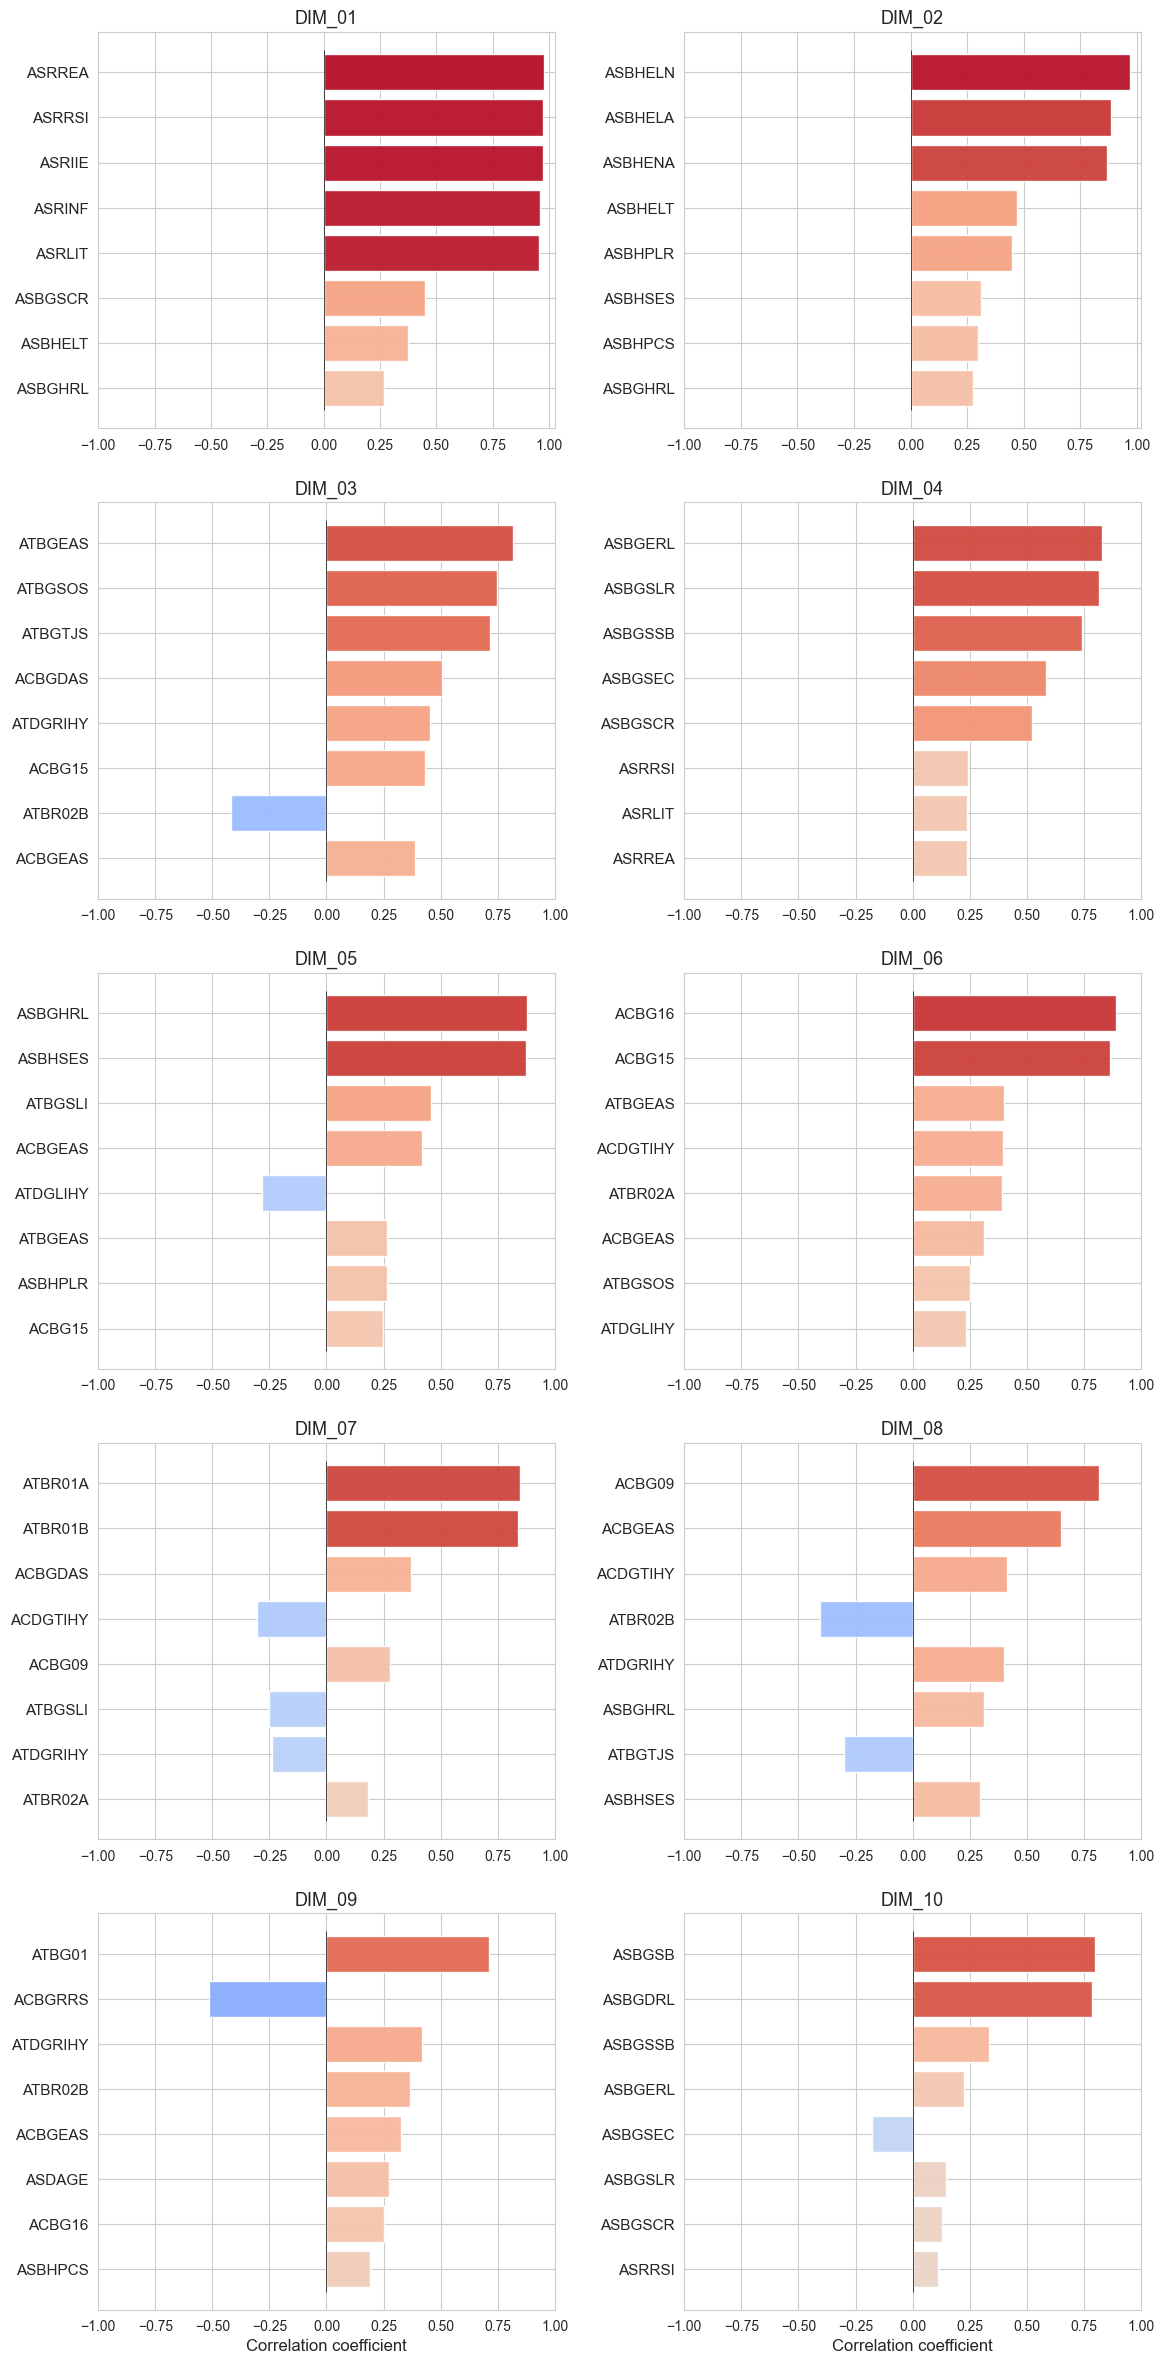

In [39]:
dr.plot_num_main_contributors(n_contributors=8) #, output_path='PATH.jpg')

# # 绘制全部数值变量的主要贡献变量图表
# dr.plot_num_main_contributors(n_contributors=8,  # 显示前8个主要贡献变量
#                               output_path=os.path.join("img_MAC", '全部数值主成分的主要贡献变量图表dim_red_num_contributors.jpg')
#                               )
# print("已完成全部数值主成分的主要贡献变量图表的生成。")

In case we're interested in looking at one component in more detail, we can obtain its main conrobutors.

如果我们有兴趣更详细地查看某个成分，我们可以获得其主要贡献者。

In [40]:
# 解释其中提取成分 Explain fourth extracted component
print("其中一个数值主成分的主要贡献变量\n", dr.num_main_contributors(dim_idx=0)) # 打印主要贡献变量 

其中一个数值主成分的主要贡献变量
   component var_name  corr_coeff
0    dim_01   ASRREA      0.9772
1    dim_01   ASRRSI      0.9752
2    dim_01   ASRIIE      0.9735
3    dim_01   ASRINF      0.9614
4    dim_01   ASRLIT      0.9583


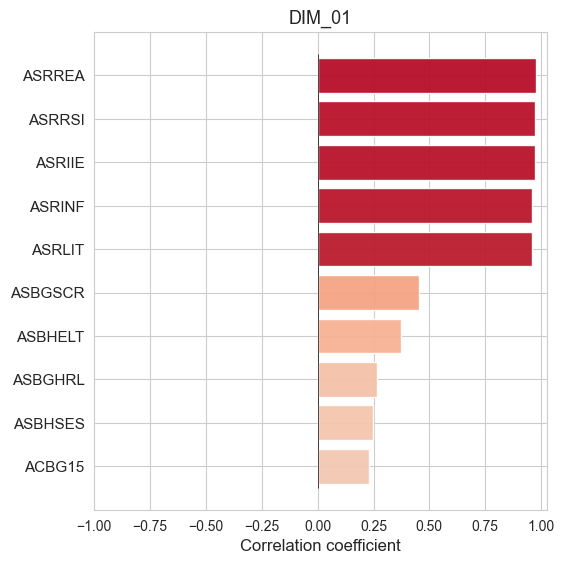

In [41]:
dr.plot_num_main_contributors(n_contributors=10, dim_idx=0) #, output_path='PATH.jpg')

For components extracted from categorical variables, we're interested in the original categorical variables with high partial eta squared coefficient values.

对于从分类变量中提取的成分，我们感兴趣的是具有高偏η平方系数值的原始分类变量。


In [42]:
# 分类变量
# 多重对应分析（MCA）
dr.cat_trans_

,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
0,0.1420,-0.1442,0.0586,0.0155,0.0462,-0.0489,0.0561,-0.1320,0.1879
1,0.1497,-0.1418,0.0267,-0.0046,0.0393,-0.0557,0.0690,-0.0945,0.1883
2,0.1105,-0.1424,0.0700,0.0558,0.0513,-0.0672,0.0321,-0.1737,0.1778
3,0.1831,-0.1367,-0.0239,-0.0527,0.0270,-0.0379,0.0626,-0.0490,0.2067
4,0.1566,-0.1475,0.0009,-0.0198,0.0292,-0.0563,0.0632,-0.0697,0.1845
...,...,...,...,...,...,...,...,...,...
4104,0.0169,-0.1688,0.0086,-0.3153,-0.1003,0.0871,-0.0681,-0.0874,-0.0345
4105,0.0231,-0.1558,-0.0161,-0.3257,-0.0783,0.0762,-0.0723,-0.0893,-0.0083
4106,0.0334,-0.1615,-0.0413,-0.3633,-0.0933,0.0829,-0.0515,-0.0419,-0.0078
4107,0.0192,-0.1589,-0.0348,-0.3719,-0.1008,0.0946,-0.0473,-0.0445,-0.0215


In [43]:
dr.cat_components_

['dim_11',
 'dim_12',
 'dim_13',
 'dim_14',
 'dim_15',
 'dim_16',
 'dim_17',
 'dim_18',
 'dim_19']

In [44]:
# dr.cat_main_contributors().head(10)

print("全部分类主成分的主要贡献变量:\n", dr.cat_main_contributors()) #############################
# 解释从分类变量中提取的成分:结果保存
dr.cat_main_contributors().to_csv('data_MAC/data_澳门_modified_全部分类主成分的主要贡献变量.csv', index=False)

C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: di

全部分类主成分的主要贡献变量:
     component var_name  corr_ratio
0      dim_11  ATBR10G      0.4759
1      dim_11  ATBR10I      0.4345
2      dim_11  ATBR10J      0.3986
3      dim_11  ATBR10H      0.3872
4      dim_11  ATBR10E      0.3872
..        ...      ...         ...
199    dim_19  ATBR13D      0.2157
200    dim_19  ATBR09H      0.2128
201    dim_19   ACBG17      0.2063
202    dim_19   ATBR15      0.1754
203    dim_19  ATBR17B      0.1641

[204 rows x 3 columns]


C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: di

### 2.3. Dimensionality reduction evaluation 降维评估


#### 累积解释方差曲线：展示随主成分数量增加，累积方差的增长趋势。
Explained variance（cumulative ratio） 解释方差（累积比）

    50% Explained variance  50%解释方差
    Optimal number of components 最优成份数
    Minimum number of components for 50% explained variance 50%解释方差的最小成份数量
X 轴：主成分数量（1, 2, 3, ...）。

Y 轴：累积解释方差比率（0% 到 100%）。

标注：

红色虚线：手肘点（自动选择的最优成分数，如 3）。

绿色虚线：达到 50% 累积方差所需的最小成分数（如 4）。

灰色虚线：用户设定的阈值（50%）。


#### 单个成分解释方差比：每个主成分单独解释的方差比例
Explained variance（ratio） 解释方差（比率）

    Average explained variance(%) 平均解释方差（%）
    Optimal number of components 最优成份数
    Number of components above average explained variance 高于平均值解释方差的成分数
X 轴：主成分数量。

Y 轴：每个主成分单独解释的方差比率。

标注：

灰色虚线：平均解释方差（总方差/成分数）。

红色虚线：手肘点。

绿色虚线：超过平均方差的成分数。

#### 归一化方差曲线：标准化后的方差变化（用于观察方差衰减速度）
Normalized explained variance curve 归一化解释方差曲线

    Difference curve 差异曲线
    Optimal number of components 最优成份数
X 轴：主成分数量。

Y 轴：归一化后的方差曲线（方差值标准化处理后的衰减趋势）。

标注：手肘点标识最优成分数。

#### 可视化验证：plot_num_explained_variance() 的作用是 将这一过程可视化，帮助确认：

自动选择的拐点（手肘点）是否合理（是否符合业务预期）。

用户设置的阈值（如 50%）与拐点的位置是否一致。

##### 作用

1.确定最优成分数：通过手肘点（红色虚线）找到解释方差增益显著下降的位置，平衡信息保留与降维效率。

    示例：若手肘点在成分 3，累积方差达 45%，需权衡是否接受或调高阈值。

2.验证阈值达成情况：检查绿色虚线位置（如成分 4 达 50%），确认是否满足业务需求的最小信息保留要求。

3.评估成分价值：

    通过单个成分方差比，识别高贡献主成分（如成分 1 解释 30% 方差）。

    通过超过平均方差的成分数（绿色虚线），筛选关键成分。


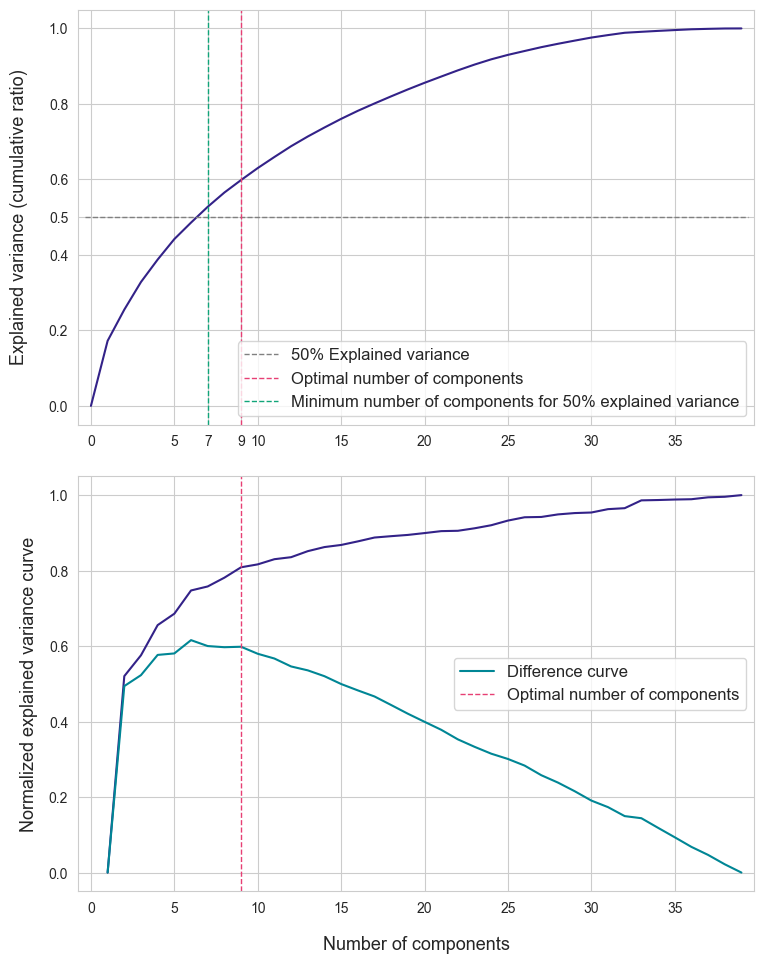

In [45]:
# 数值变量降维（SPCA/PCA） 的解释方差曲线

# 解释方差 + 肘部法 Explained variance + elbow method
# 数值变量降维（SPCA/PCA） 的解释方差曲线，辅助验证手肘法选择的成分数是否合理。
# dr.plot_num_explained_variance(0.5, plots=['cumulative', 'ratio', 'normalized'],
#                                output_path=os.path.join("img_MAC", "数值变量降维的解释方差曲线dim_red_explained_variance.jpg"))
# print("已完成数值变量降维的解释方差曲线的生成。")


dr.plot_num_explained_variance(plots=['cumulative', 'normalized']) #, output_path='PATH.jpg')

# 1. 函数作用
# 目的：绘制 数值变量降维（SPCA/PCA） 的解释方差曲线，辅助验证手肘法选择的成分数是否合理。
# 参数 thres=0.5：在图中标出累积解释方差达到 50% 时对应的成分数

# 2. 输出内容
# 生成的图表包含以下信息（假设 plots='all'）：
# 累积解释方差曲线：展示随主成分数量增加，累积方差的增长趋势。
# 单个成分解释方差：每个主成分单独解释的方差比例。
# 归一化方差曲线：标准化后的方差变化（用于观察方差衰减速度）。
# 阈值标记：在累积方差曲线上标出 thres=0.5 的位置（即达到 50% 累积方差的成分数）。

# 3. 与手肘法的关系
# 手肘法自动选择：当 min_explained_variance_ratio=None 时，代码会通过 KneeLocator 自动找到曲线的拐点（手肘点）作为最优成分数。
# 可视化验证：plot_num_explained_variance() 的作用是 将这一过程可视化，帮助确认：
# 自动选择的拐点（手肘点）是否合理（是否符合业务预期）。
# 用户设置的阈值（如 50%）与拐点的位置是否一致。

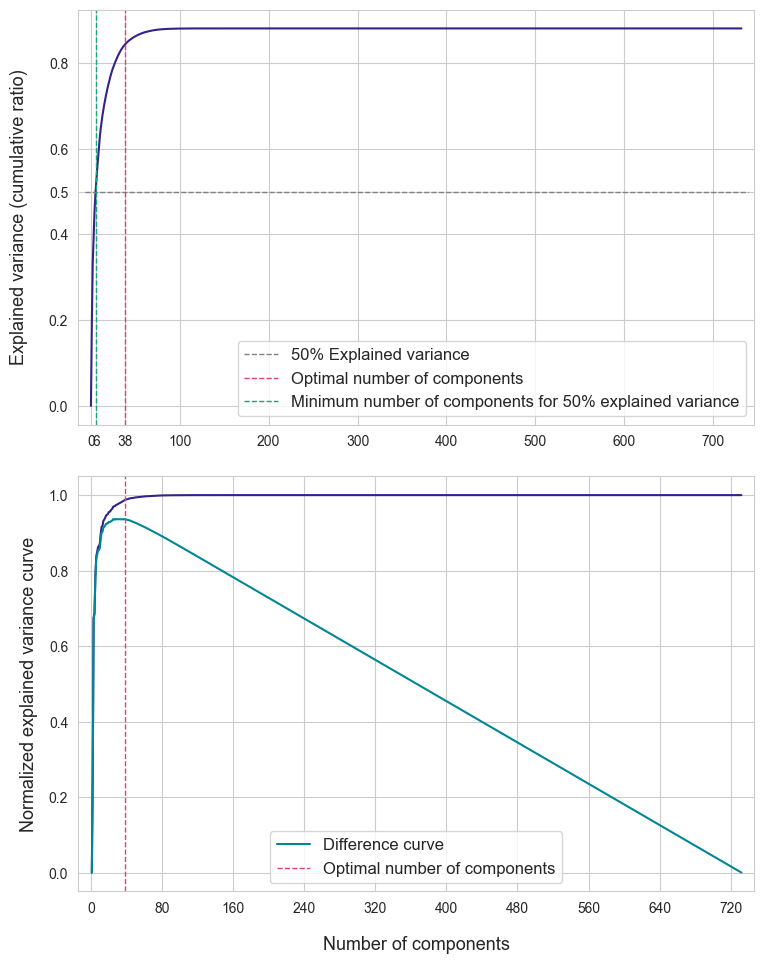

In [46]:
# # 分类变量降维（MCA） 的解释方差曲线，辅助验证手肘法选择的成分数是否合理。
# dr.plot_cat_explained_variance(0.5, plots=['cumulative', 'ratio', 'normalized'],
#                                output_path=os.path.join("img_MAC", "分类变量降维的解释方差曲线dim_red_explained_variance.jpg")) 
# print("已完成分类变量降维的解释方差曲线的生成。")

dr.plot_cat_explained_variance(plots=['cumulative', 'normalized'])

### 2.4. Advanced explainability of extracted components from categorical variables
### 从分类变量中提取的成分的高级可解释性


The following table provides the component mean and std for every value of the original value. This is helpful to evaluate if the new component properly reflects the different values of the original categorical variables.

下表提供了原始值的每个值的成分均值和标准差。这有助于评估新成分是否正确反映了原始分类变量的不同值。

In [47]:

# # 下表提供了原始值的每个值的成分均值和std。这有助于评估新组件是否正确地反映了原始分类变量的不同值。
print("解释从分类变量中提取的成分:\n", dr.cat_main_contributors_stats())
# dr.cat_main_contributors_stats()
# 解释从分类变量中提取的成分:结果保存
dr.cat_main_contributors_stats().to_csv('data_MAC/data_澳门_modified_解释从分类变量中提取的成分.csv', index=False)
print("已完成，解释从分类变量中提取的成分，结果保存。")

C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: di

解释从分类变量中提取的成分:
     component var_name  var_value  component_mean  component_std
0      dim_11  ATBR10G          1         -0.2191         0.2370
1      dim_11  ATBR10G          2          0.0831         0.1891
2      dim_11  ATBR10G          3          0.3414         0.2002
3      dim_11  ATBR10G          4          0.4403         0.2926
4      dim_11  ATBR10I          1         -0.2789         0.2173
..        ...      ...        ...             ...            ...
747    dim_19   ATBR15          4         -0.0365         0.1049
748    dim_19   ATBR15          5          0.1281         0.0970
749    dim_19  ATBR17B          1          0.0275         0.1535
750    dim_19  ATBR17B          2          0.0104         0.1778
751    dim_19  ATBR17B          3         -0.2868         0.2239

[752 rows x 5 columns]


C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: di

已完成，解释从分类变量中提取的成分，结果保存。


C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1


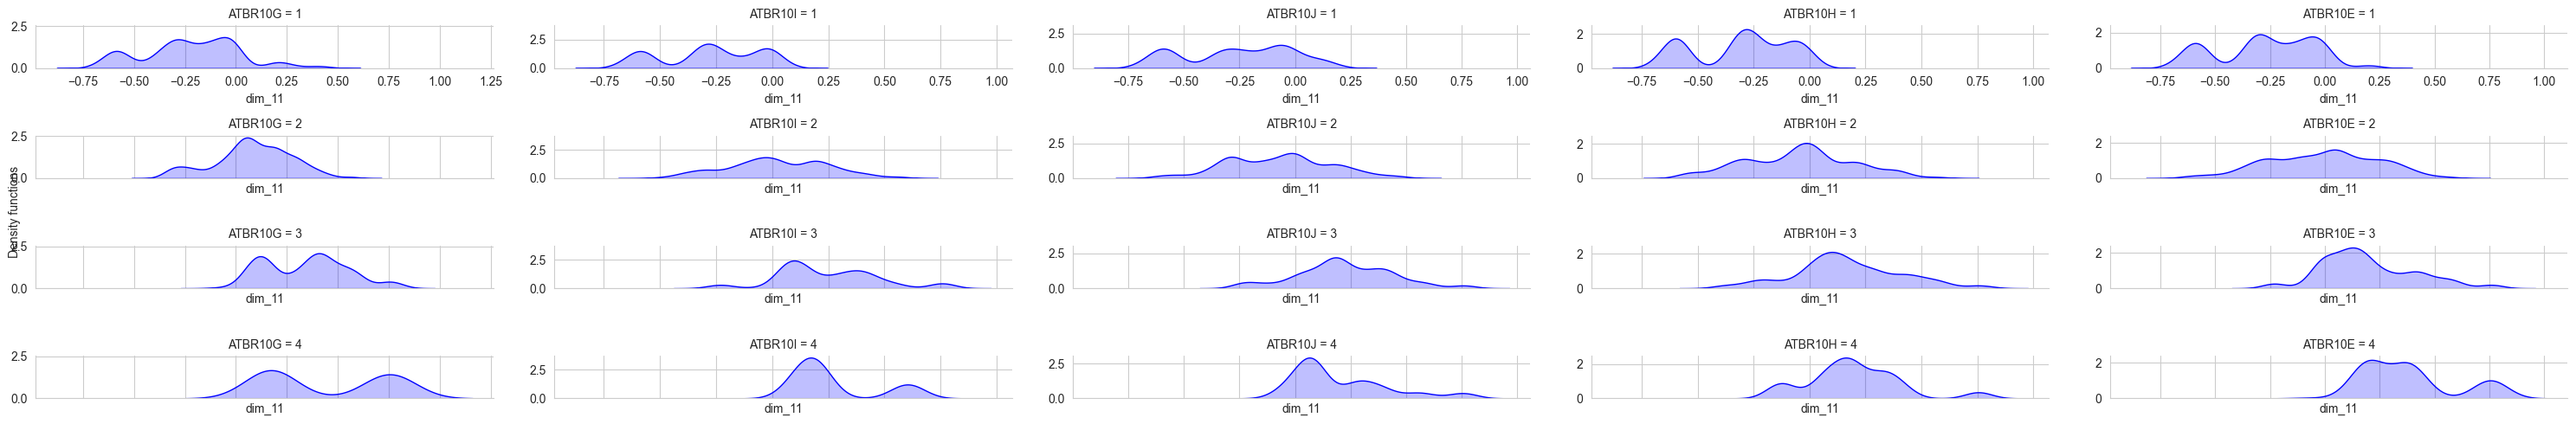

In [48]:
# dr.plot_cat_main_contributor_distribution(dim_idx=0) #, output_path='PATH.jpg')


# 在分类变量的降维过程中（如MCA）后，有几个原始变量与新的构造变量（主成分）高度相关，默认相关性阈值为0.14
# 绘制分类变量成分分布
dr.plot_cat_main_contributor_distribution(dim_idx=0, 
                                          thres=0.5,  # 提高相关性阈值
                                          n_contributors=5  # 增加显示数量
                                          )

# dr.plot_cat_main_contributor_distribution(dim_idx=0, 
#                                           thres=0.5,  # 提高相关性阈值
#                                           n_contributors=5,  # 增加显示数量
#                                           output_path=os.path.join("img_MAC", "分类变量成分分布dim_red_cat_component.jpg"))
# print("已完成分类变量成分分布的生成。")

### 2.5. PCA vs SPCA 

PCA（Principal Component Analysis，主成分分析）是一种经典的线性无监督降维方法，用于将高维数据转换为低维数据，同时尽可能保留原始数据的方差。PCA通过线性变换将原始数据映射到一个新的坐标系统中，使得数据在新坐标系中的第一大方差在第一个坐标（第一主成分）上，第二大方差在第二个坐标（第二主成分）上，依次类推。PCA的目标是通过保留低阶主成分来忽略高阶主成分，从而简化数据结构。

SPCA（Sparse Principal Component Analysis，稀疏主成分分析）是PCA的一种变体，它通过引入L1正则化来实现稀疏性。SPCA的目标不仅是要最大化方差，还要最小化特征向量的L1范数，使得只有少量的特征向量被选中。这种稀疏性质使得SPCA在处理高维数据时能够更好地识别和保留数据中的重要特征，同时忽略不重要的特征。因此，SPCA特别适用于需要识别数据中少数重要特征的场景。

总的来说，PCA和SPCA都是用于数据降维的技术，但SPCA通过稀疏性提供了更好的特征选择能力。

The following plot compares the cumulative explained variance with PCA and SPCA (for the number of components calculated for SPCA). Note that unlike PCA, SPCA will generate a different first component when computing different numbers of components.

下图比较了PCA和SPCA的累积解释方差（对于SPCA计算的成分数量）。请注意，与PCA不同，SPCA在计算不同数量的成分时会生成不同的第一个成分。

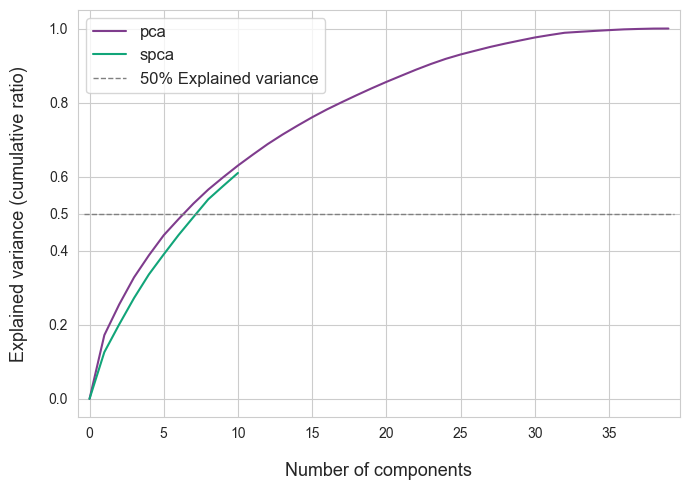

In [49]:
# 稀疏性的影响：
# SPCA 通过引入稀疏性限制，使得主成分更加稀疏，易于解释。然而，这种稀疏性可能导致在相同主成分数量下，SPCA 的解释方差低于 PCA。
# 在实际应用中，这种权衡需要根据具体需求进行选择：如果需要更高的解释性，可以选择 SPCA；如果需要更高的解释方差，可以选择 PCA。

dr.plot_cumulative_explained_var_comparison(thres=0.5)

The following plot compares the coefficients of the second principal component obtained with PCA (green bars) and SPCA (pink points).

以下图表比较了通过PCA（绿色条）和SPCA（粉色点）获得的第二主成分的系数。

横轴是原始变量，

纵轴是主成分的系数值。


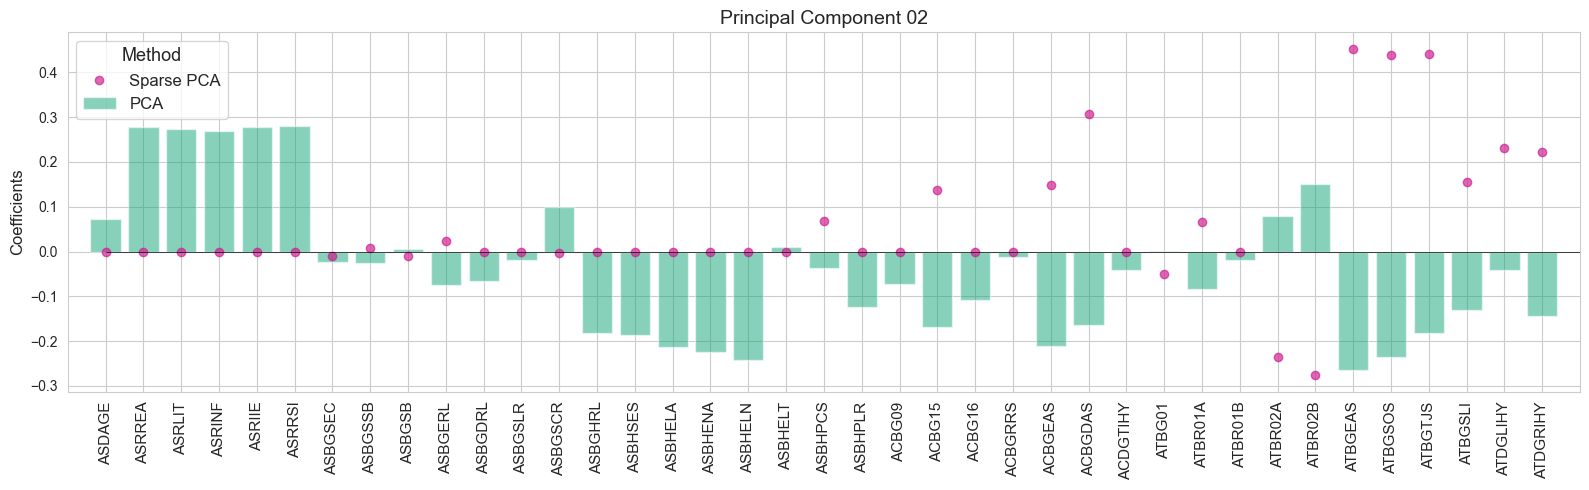

In [50]:
plot_compare_pca_based_components(dr.pca_.components_[1], dr.num_model.components_[1], num_vars, n_pc=2)

Export results.

In [51]:
t.to_csv('data_MAC/data_澳门_modified_preprocessed_dim_red_output.csv', index=False)

## Reproducibility check 可重复性检查

In [52]:
t_ref = pd.read_csv('data_MAC/data_澳门_modified_preprocessed_dim_red_output.csv')

check_df = t_ref.mean().to_frame(name='reference').merge(t.mean().to_frame(name='current_run'), left_index=True, right_index=True)
check_df['diff'] = np.abs(check_df['reference'] - check_df['current_run']) > 1e-6
print('Diff', check_df['diff'].sum())

Diff 0
